<a href="https://colab.research.google.com/github/varun226/Relative-Strength-Index-RSI-/blob/main/RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Relative Strength Index(RSI) and Python is used to determine if a stock is over bought or over sold  

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load the data
from google.colab import files 
uploaded=files.upload()

Saving FB.csv to FB.csv


In [ ]:
# Store the data
FB=pd.read_csv('FB.csv')

#Show the data
FB

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,54.830002,55.220001,54.189999,54.709999,54.709999,43195500
1,2014-01-03,55.020000,55.650002,54.529999,54.560001,54.560001,38246200
2,2014-01-06,54.419998,57.259998,54.049999,57.200001,57.200001,68852600
3,2014-01-07,57.700001,58.549999,57.220001,57.919998,57.919998,77207400
4,2014-01-08,57.599998,58.410000,57.230000,58.230000,58.230000,56682400
...,...,...,...,...,...,...,...
1887,2021-07-01,346.820007,354.670013,346.500000,354.390015,354.390015,17137000
1888,2021-07-02,355.100006,356.440002,352.619995,354.700012,354.700012,11521300
1889,2021-07-06,356.500000,358.790009,349.179993,352.779999,352.779999,13488500
1890,2021-07-07,355.260010,356.489990,350.000000,350.489990,350.489990,14218900


In [ ]:
# Set the index as the date for the given data
FB=FB.set_index(pd.DatetimeIndex(FB['Date'].values))

#Show the data
FB


,Date,Open,High,Low,Close,Adj Close,Volume
2014-01-02,2014-01-02,54.830002,55.220001,54.189999,54.709999,54.709999,43195500
2014-01-03,2014-01-03,55.020000,55.650002,54.529999,54.560001,54.560001,38246200
2014-01-06,2014-01-06,54.419998,57.259998,54.049999,57.200001,57.200001,68852600
2014-01-07,2014-01-07,57.700001,58.549999,57.220001,57.919998,57.919998,77207400
2014-01-08,2014-01-08,57.599998,58.410000,57.230000,58.230000,58.230000,56682400
...,...,...,...,...,...,...,...
2021-07-01,2021-07-01,346.820007,354.670013,346.500000,354.390015,354.390015,17137000
2021-07-02,2021-07-02,355.100006,356.440002,352.619995,354.700012,354.700012,11521300
2021-07-06,2021-07-06,356.500000,358.790009,349.179993,352.779999,352.779999,13488500
2021-07-07,2021-07-07,355.260010,356.489990,350.000000,350.489990,350.489990,14218900


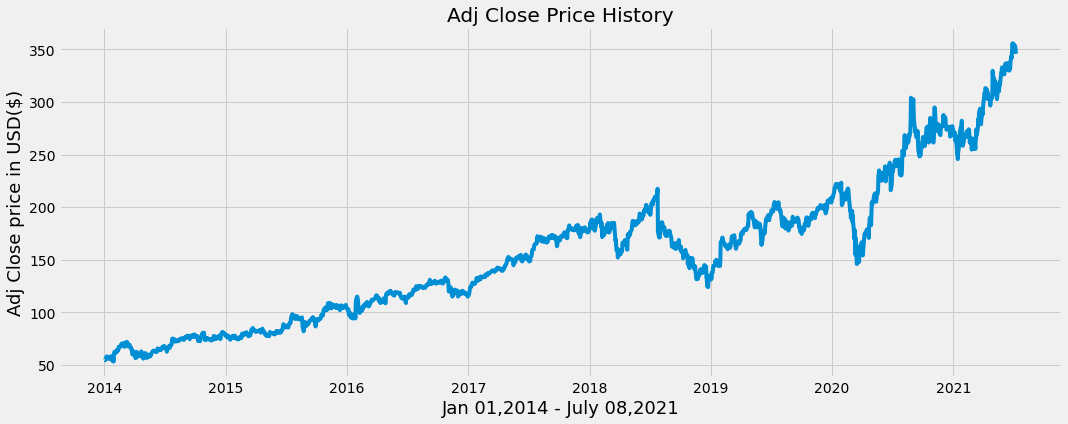

In [ ]:
# Visually show the data
plt.figure(figsize=(16,6))
plt.plot(FB.index,FB['Adj Close'],label='Adj Close Price')
plt.title('Adj Close Price History')
plt.xlabel('Jan 01,2014 - July 08,2021', fontsize= 18)
plt.ylabel('Adj Close price in USD($)',fontsize=18)
plt.show()



In [ ]:
#Prepare the data to get the RSI

# Get the difference in the price per day( Difference between current dya - previous day price)
delta= FB['Adj Close'].diff(1)
delta

2014-01-02         NaN
2014-01-03   -0.149998
2014-01-06    2.640000
2014-01-07    0.719997
2014-01-08    0.310002
                ...   
2021-07-01    6.680024
2021-07-02    0.309997
2021-07-06   -1.920013
2021-07-07   -2.290009
2021-07-08   -4.839996
Name: Adj Close, Length: 1892, dtype: float64

In [ ]:
# Drop the Nan value
delta=delta.dropna()
delta

2014-01-03   -0.149998
2014-01-06    2.640000
2014-01-07    0.719997
2014-01-08    0.310002
2014-01-09   -1.009999
                ...   
2021-07-01    6.680024
2021-07-02    0.309997
2021-07-06   -1.920013
2021-07-07   -2.290009
2021-07-08   -4.839996
Name: Adj Close, Length: 1891, dtype: float64

In [ ]:
# Get the positive gains (UP) and negative gains (Down)
UP=delta.copy()
Down= delta.copy()

UP[UP<0]=0
Down[Down > 0]=0

In [ ]:
# Get the time period
period=14

# calculate the average gain and the average loss
AVG_gain=UP.rolling(window=period).mean()
AVG_loss= abs(Down.rolling(window=period).mean()) # abs() as AVG_loss will give neagtive values 


In [ ]:
# Calculate the RSI

#Calculate the Relative Strength
RS = AVG_gain/AVG_loss

#Calculate the RSI 
RSI = 100.0 - (100.0/(1.0+RS))


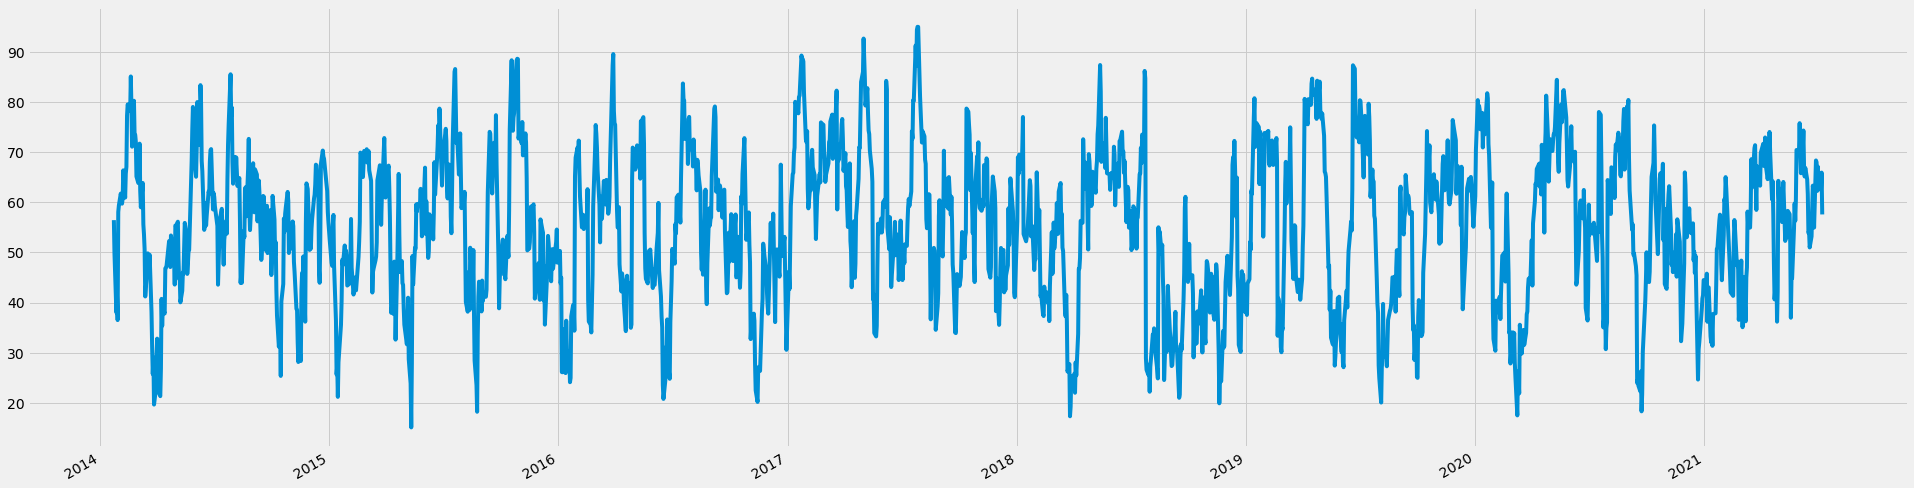

In [ ]:
# Show the RSI Visually 
plt.figure(figsize=(30,9))
RSI.plot()
plt.show()

In [ ]:
# Puttting it all together 

# Create a new Data Frame 

new_df= pd.DataFrame()
new_df['Adj Close Price'] = FB['Adj Close']
new_df['RSI']= RSI
new_df

,Adj Close Price,RSI
2014-01-02,54.709999,NaN
2014-01-03,54.560001,NaN
2014-01-06,57.200001,NaN
2014-01-07,57.919998,NaN
2014-01-08,58.230000,NaN
...,...,...
2021-07-01,354.390015,67.085229
2021-07-02,354.700012,64.346295
2021-07-06,352.779999,62.447564
2021-07-07,350.489990,65.907204


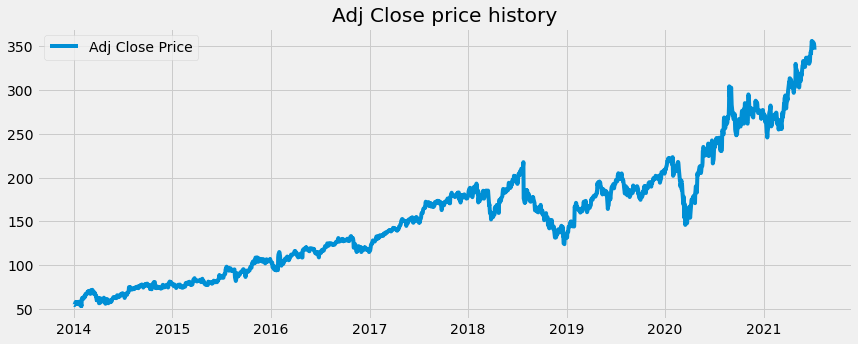

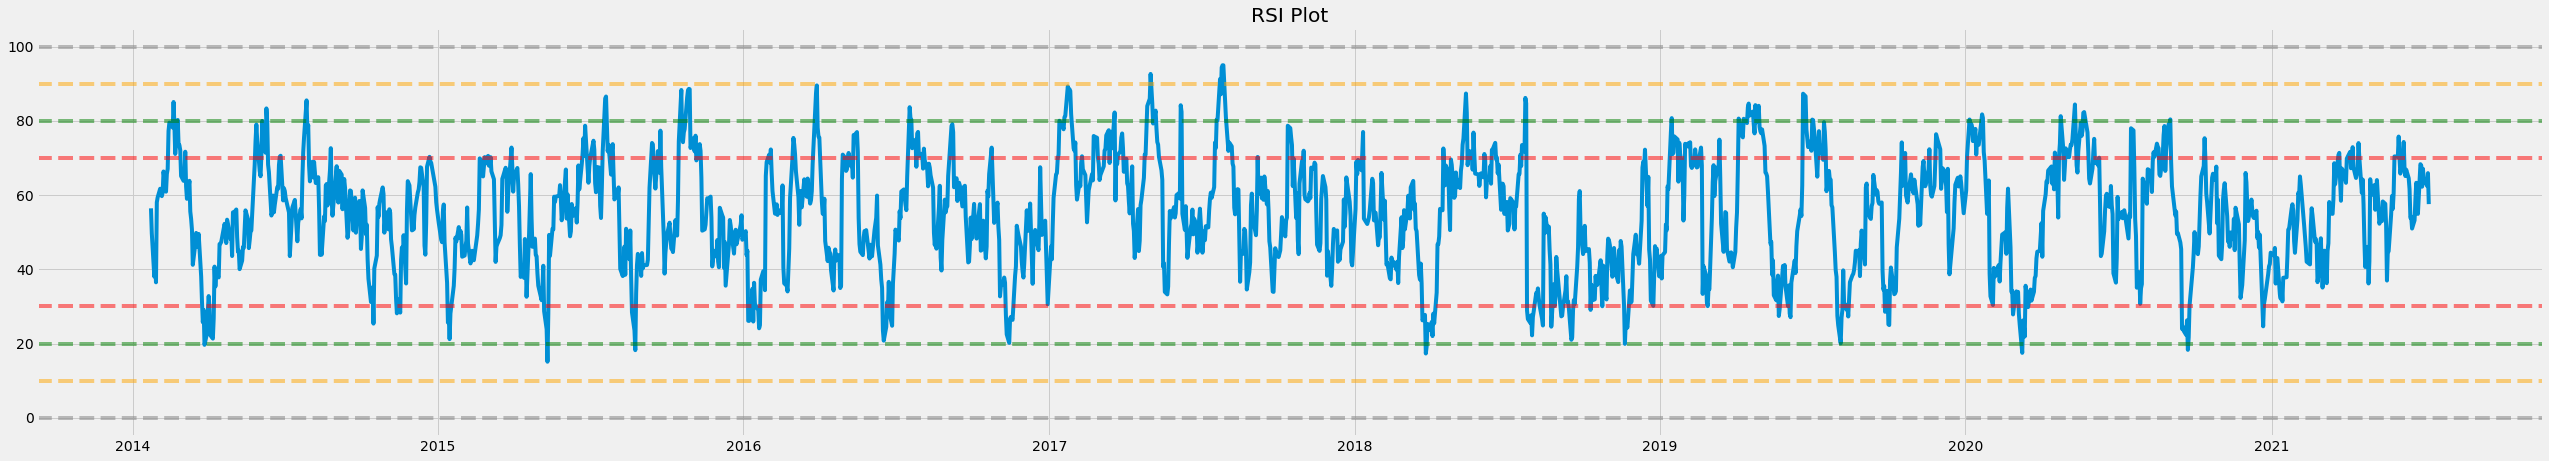

In [ ]:
# Visually represent the Adj CLose Price and the RSI

# Plot the Adj Close price
plt.figure(figsize=(13,5))
plt.plot(new_df.index, new_df['Adj Close Price'])
plt.title("Adj Close price history")
plt.legend(new_df.columns.values, loc= 'upper left')
plt.show()

# Plot the RSI values 
plt.figure(figsize=(40,7))
plt.plot(new_df.index, new_df['RSI'])
plt.title("RSI Plot")
plt.axhline(0,linestyle='--', alpha=0.5 , color='gray')
plt.axhline(10,linestyle='--', alpha=0.5 , color='orange')
plt.axhline(20,linestyle='--', alpha=0.5 , color='green')
plt.axhline(30,linestyle='--', alpha=0.5 , color='red')
plt.axhline(70,linestyle='--', alpha=0.5 , color='red')
plt.axhline(80,linestyle='--', alpha=0.5 , color='green')
plt.axhline(90,linestyle='--', alpha=0.5 , color='orange')
plt.axhline(100,linestyle='--', alpha=0.5 , color='gray')
plt.show()